# 2024010381 진승원 

In [1]:
from qiskit import *
# from qiskit import Aer, execute
from qiskit_aer import StatevectorSimulator
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity
import numpy as np
from IPython.display import Image, display

### Define necessary Functions (can be skipped)

In [2]:
def density_matrix_to_statevector(rho):
    """
    Convert a density matrix to a state vector, if the density matrix represents a pure state.
    
    Args:
        rho (np.ndarray): Density matrix (must be square and Hermitian).
    
    Returns:
        np.ndarray: Statevector corresponding to the pure state, or None if not a pure state.
    """
    # Check if rho is Hermitian
    if not np.allclose(rho, rho.conj().T):
        raise ValueError("The density matrix is not Hermitian.")
    
    # Check purity: Tr(rho^2) should be 1 for a pure state
    purity = np.trace(np.dot(rho, rho))
    if not np.isclose(purity, 1):
        print("The density matrix does not represent a pure state.")
        print(f"Purity: {np.round(purity,3)}")
        return None
    if np.isclose(purity, 1):
        # print("This is the Pure state, ",f"Purity: {np.round(purity,3)}")
        # Find eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(rho)
        
        # Identify the eigenvector corresponding to eigenvalue 1
        idx = np.argmax(eigenvalues)
        statevector = eigenvectors[:, idx]
        
        # Ensure normalization (optional safety check)
        statevector /= np.linalg.norm(statevector)
        statevector = Statevector(statevector)
        
        return statevector

In [3]:
def get_code_state(qc):
    backend = StatevectorSimulator()
    result = backend.run(qc).result()
    final_state = Statevector(result.get_statevector())
    final_state = partial_trace(final_state, [3,4,5,6])
    final_state = np.array(final_state)
    final_state = density_matrix_to_statevector(final_state)
    return final_state
    

<img src="Assignment Instruction.png" alt="My Image" width="600">

# Shor's Bit Flip code

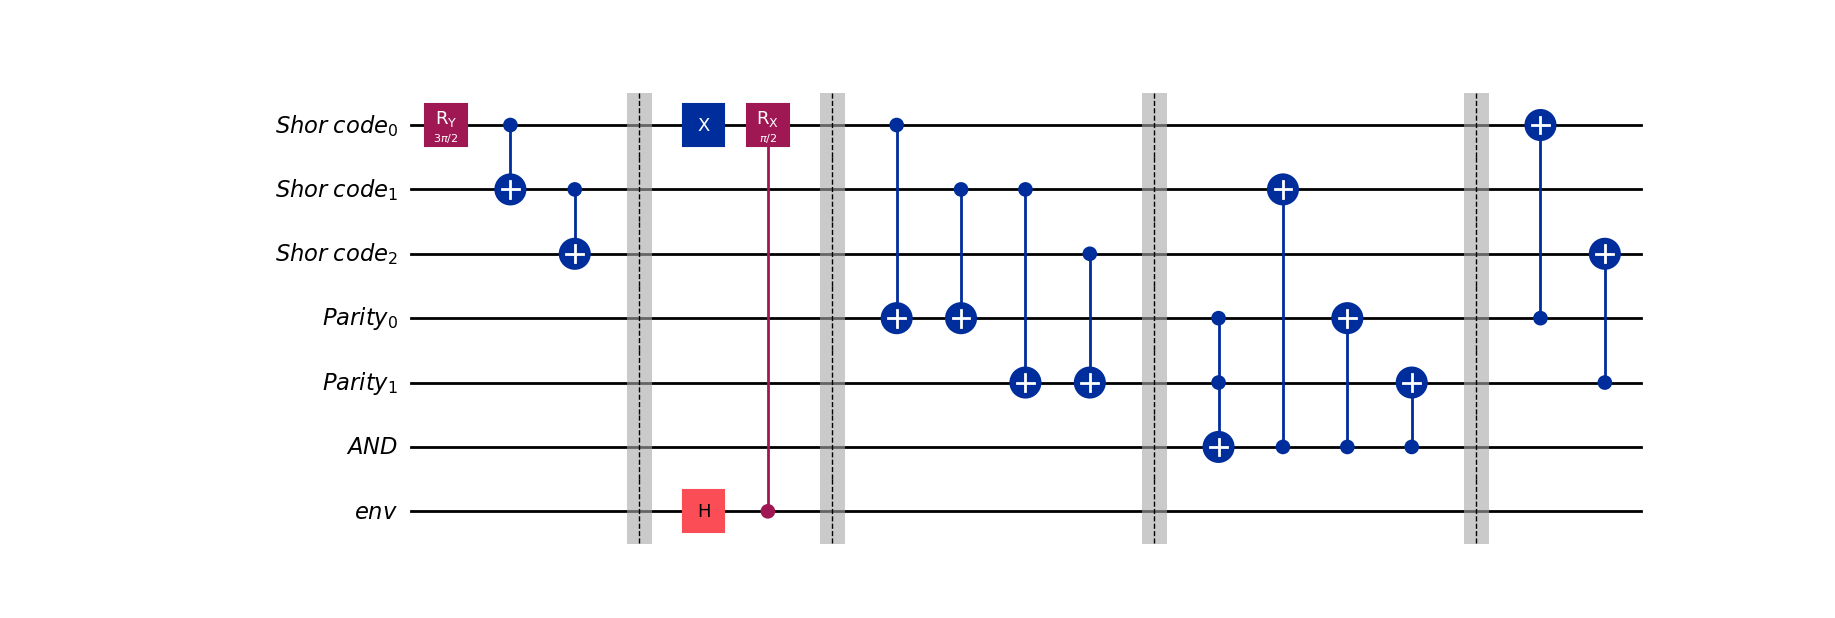

The density matrix does not represent a pure state.
Purity: (0.75+0j)


In [4]:
q1 = QuantumRegister(3, 'Shor code')    # Shor code qubits
q2 = AncillaRegister(2, 'Parity')       # Parity qubit
q3 = AncillaRegister(1, 'AND')          # AND qubit
q4 = AncillaRegister(1, 'env')          # Environment

qc1 = QuantumCircuit(q1, q2, q3, q4)

# encoding
# qc1.h(0)  # for + state
# qc1.x(0)  # for -1 state
qc1.ry(np.pi*1.5, 0)
qc1.cx(0,1)
qc1.cx(1,2)
qc1.barrier()

qc1_init = qc1.copy()

# bit flip error operation
qc1.x(0)
# entanglement with environment error
qc1.h(6), qc1.crx(np.pi/2, 6, 0)
qc1.barrier()

qc1_error = qc1.copy()

# Below here shows the parity check and error correcting part
# parity check usually done by measuring the parity qubits
# but here we are doing it by using quantum gates

# parity check
qc1.cx(0,3), qc1.cx(1,3)
qc1.cx(1,4), qc1.cx(2,4)
qc1.barrier()

# error correction
qc1.ccx(3,4,5), qc1.cx(5,1), qc1.cx(5,3), qc1.cx(5,4)
qc1.barrier()
qc1.cx(3,0)
qc1.cx(4,2)

circuit_plot = qc1.draw(output='mpl')
circuit_plot.savefig('circuit_bit_flip.png')
display(Image(filename='circuit_bit_flip.png'))

# Simulate the statevector
try:
    get_code_state(qc1_error).draw('latex')
except:
    None

# Three far right numbers represent the final state of qubits 
# the rest are ancillas

## Extract Shor Code states

In [94]:
final_state = get_code_state(qc1)
print("Error corrected state (ignore the global pahse):")
final_state.draw('latex')

Error corrected state:


<IPython.core.display.Latex object>

## Initial state and compare

In [95]:
final_state_init = get_code_state(qc1_init)
print("State fidelity btw initial state and the error corrected state is ",state_fidelity(final_state_init, final_state))

State fidelity btw initial state and the error corrected state is  1.0


# Shor's Phase Flip code

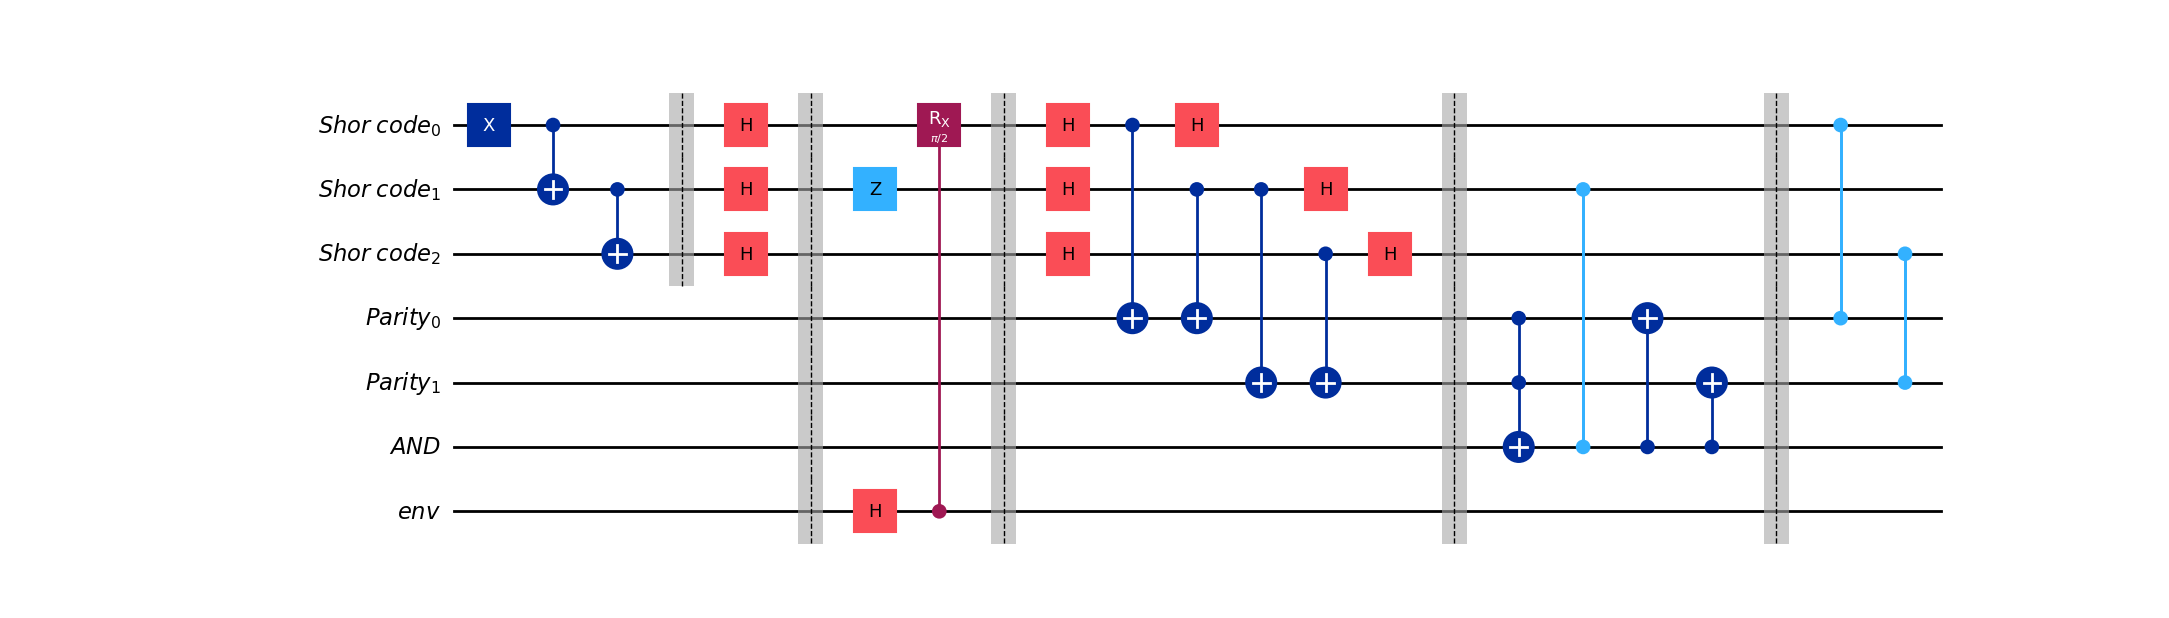

In [ ]:
q1 = QuantumRegister(3, 'Shor code')    # Shor code qubits
q2 = AncillaRegister(2, 'Parity')       # Parity qubit
q3 = AncillaRegister(1, 'AND')          # AND qubit
q4 = AncillaRegister(1, 'env')          # Environment

qc2 = QuantumCircuit(q1, q2, q3, q4)

# encoding
qc2.x(0)  # for -1 state
# qc1.h(0)  # for + state
# qc1.ry(np.pi*1.5, 0)
qc2.cx(0,1)
qc2.cx(1,2)
qc2.barrier(0,1,2)
[qc2.h(i) for i in range(3)]
qc2.barrier()

qc2_init = qc2.copy()

# phase flip error operation
qc2.z(1)
# entanglement with environment error
qc2.h(6), qc2.crx(np.pi/2, 6, 0)
qc2.barrier()
qc2_error = qc2.copy()

# Below here shows the parity check and error correcting part
# parity check usually done by measuring the parity qubits
# but here we are doing it by using quantum gates

# parity check
qc2.h(0), qc2.cx(0,3), qc2.h(0)
qc2.h(1), qc2.cx(1,3), qc2.cx(1,4), qc2.h(1)
qc2.h(2), qc2.cx(2,4), qc2.h(2)
qc2.barrier()

# # error correction
qc2.ccx(3,4,5), qc2.cz(5,1), qc2.cx(5,3), qc2.cx(5,4)
qc2.barrier()
qc2.cz(3,0)
qc2.cz(4,2)

circuit_plot = qc2.draw(output='mpl')
circuit_plot.savefig('circuit_phase_flip.png')
display(Image(filename='circuit_phase_flip.png'))

# # Simulate the statevector
[qc2_error.h(i) for i in range(3)]
try:
    get_code_state(qc2_error).draw('latex')
except:
    None

# Three far right numbers represent the final state of qubits 
# the rest are ancillas


# decoding
qc2.barrier()
[qc2.h(i) for i in range(3)]

In [97]:
[qc2.h(i) for i in range(3)]
print("Error corrected state (ignore the global pahse):")
get_code_state(qc2).draw('latex')

Error corrected state:


<IPython.core.display.Latex object>

In [98]:
[qc2_init.h(i) for i in range(3)]
get_code_state(qc2_init)
print("State fidelity btw initial state and the error corrected state is ",state_fidelity(final_state_init, final_state))

State fidelity btw initial state and the error corrected state is  1.0


# Shor's 9 qubit code

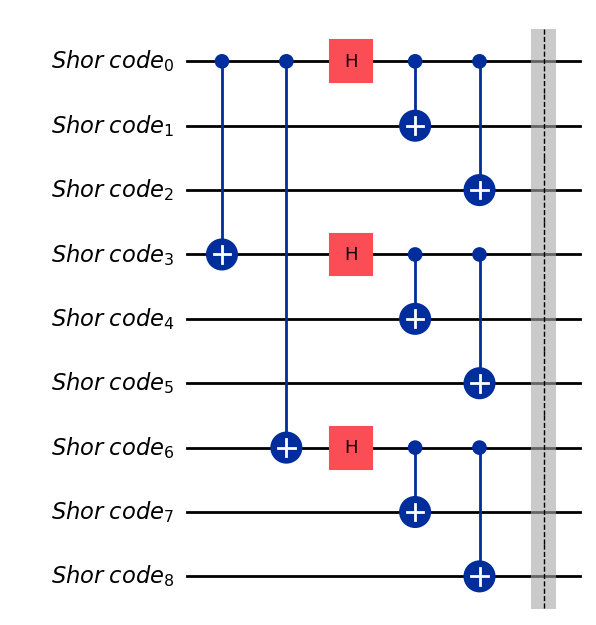

In [36]:
q1 = QuantumRegister(9, 'Shor code')    # Shor code qubits
q2 = AncillaRegister(2, 'Parity')       # Parity qubit
q3 = AncillaRegister(1, 'AND')          # AND qubit
q4 = AncillaRegister(1, 'env')          # Environment

qc3 = QuantumCircuit(q1)
# qc3 = QuantumCircuit(q1, q2, q3, q4)

qc3.cx(0,3), qc3.cx(0,6)
qc3.h(0), qc3.h(3), qc3.h(6)
qc3.cx(0,1), qc3.cx(0,2)
qc3.cx(3,4), qc3.cx(3,5)
qc3.cx(6,7), qc3.cx(6,8)
qc3.barrier()

qc3.draw('mpl')

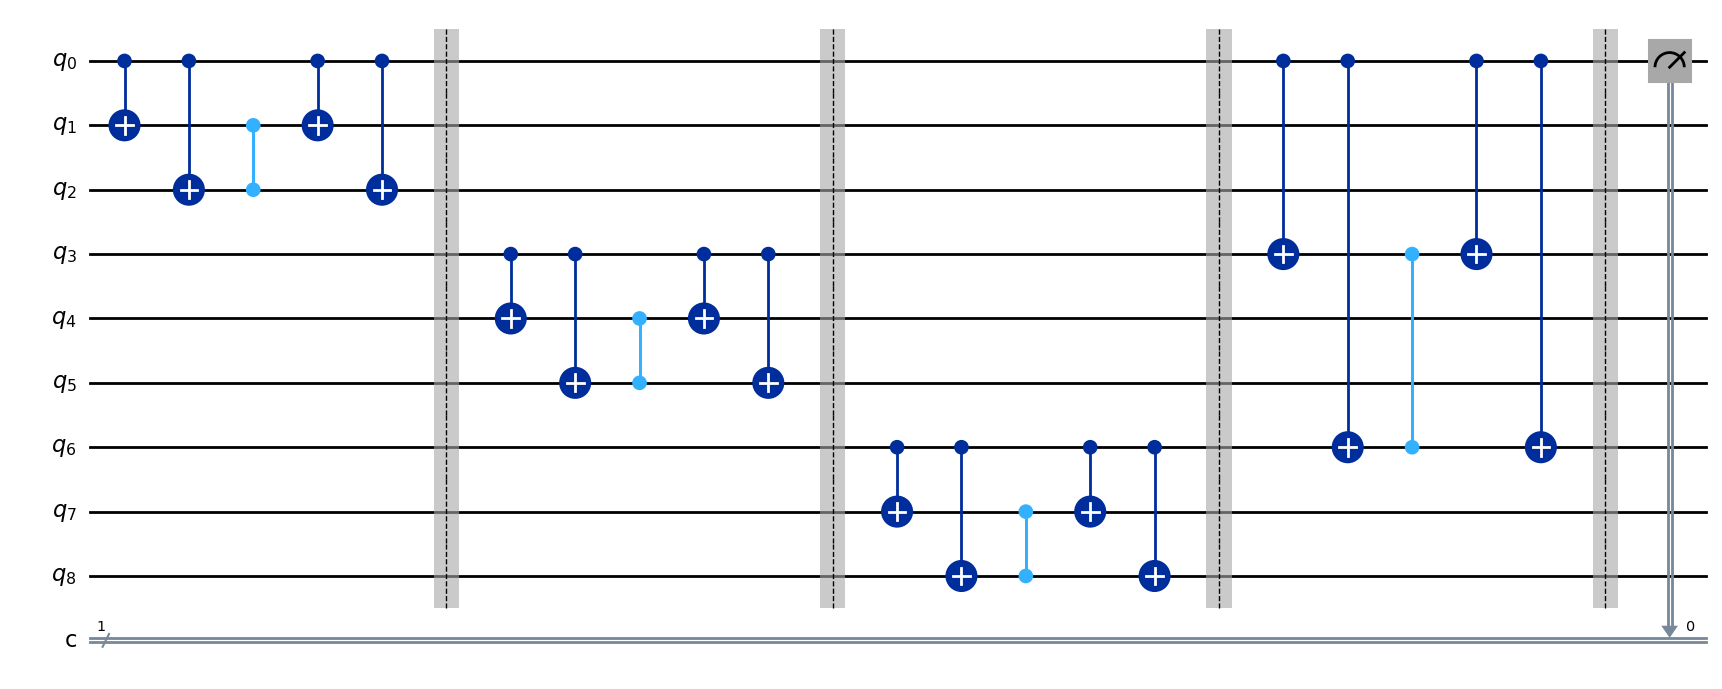

In [7]:
# Step 1: Create the Shor code decoding circuit
qc = QuantumCircuit(9, 1)  # 9 physical qubits, 1 classical bit for final measurement

# Assume the input state is already encoded (logical qubit is spread across 9 qubits)

# Perform majority voting on phase flips (reverse the encoding process)
# Un-entangle the first 3-qubit repetition
qc.cx(0, 1)
qc.cx(0, 2)
qc.cz(1, 2)  # Correct phase flips using parity checks
qc.cx(0, 1)
qc.cx(0, 2)

qc.barrier()

# Decode the second layer of repetition
qc.cx(3, 4)
qc.cx(3, 5)
qc.cz(4, 5)  # Correct phase flips using parity checks
qc.cx(3, 4)
qc.cx(3, 5)

qc.barrier()

# Decode the third layer of repetition
qc.cx(6, 7)
qc.cx(6, 8)
qc.cz(7, 8)  # Correct phase flips using parity checks
qc.cx(6, 7)
qc.cx(6, 8)

qc.barrier()

# Decode the first logical qubit
qc.cx(0, 3)
qc.cx(0, 6)
qc.cz(3, 6)  # Correct phase flips using parity checks
qc.cx(0, 3)
qc.cx(0, 6)

qc.barrier()

# Measure the logical qubit
qc.measure(0, 0)

qc.draw('mpl')

# # Step 2: Simulate the circuit
# simulator = Aer.get_backend('qasm_simulator')
# result = execute(qc, backend=simulator, shots=1024).result()
# counts = result.get_counts()

# print("Decoded state:")
# print(counts)


In [19]:
from qiskit.quantum_info import Operator
qc = QuantumCircuit(2,0)
qc.cx(0,1), qc.cx(0,1)
Operator(qc).draw('latex')

<IPython.core.display.Latex object>